<a href="https://colab.research.google.com/github/chaoszd/PandasProject/blob/main/Sendingemails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv('emails.csv')

In [7]:
df.head()

,email_id,customer_id,date,last_open,last_click,open,click
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,2021-08-11 21:35:00,NaN,True,False
1,XJ-222932815,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,NaN,NaN,False,False
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,NaN,NaN,False,False
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,NaN,NaN,False,False
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,2021-08-06 08:28:00,NaN,True,False


<Axes: xlabel='click'>

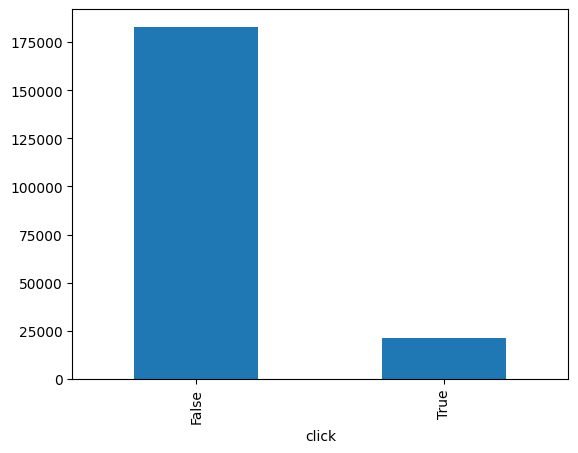

In [8]:
df.groupby('click').size().plot(kind='bar')

<Axes: xlabel='open'>

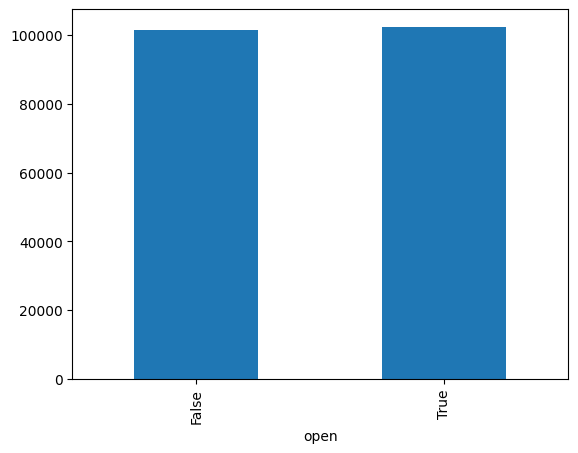

In [9]:
df.groupby('open').size().plot(kind='bar')

In [4]:
df1=pd.read_csv('email_info.csv')

In [10]:
df1.head()

,email_id,email_template_id,content_id
0,XJ-222515016,T0082,F3YS81CMB5
1,XJ-222424249,T0026,U6MGSHKHGJ
2,XJ-222345250,T0011,YLMGBFLIPC
3,XJ-222907607,T0163,VZ36M0Q0UU
4,XJ-222765582,T0129,NaN


In [11]:
df2=pd.read_csv('email_template_groups.csv')

In [12]:
df2.head()

,email_template_id,email_template_group
0,T0159,Educational
1,T0157,Engagement
2,T0155,Educational
3,T0158,Educational
4,T0127,Corporate Communication


In [13]:
df2=df1.merge(df2[['email_template_id','email_template_group']])

In [14]:
df=df.merge(df2[['email_id','email_template_group']])

In [16]:
df.head()

,email_id,customer_id,date,last_open,last_click,open,click,email_template_group
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,2021-08-11 21:35:00,NaN,True,False,Educational
1,XJ-222932815,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,NaN,NaN,False,False,Engagement
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,NaN,NaN,False,False,Educational
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,NaN,NaN,False,False,Educational
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,2021-08-06 08:28:00,NaN,True,False,Educational


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204057 entries, 0 to 204056
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   email_id              204057 non-null  object
 1   customer_id           204057 non-null  object
 2   date                  204057 non-null  object
 3   last_open             102430 non-null  object
 4   last_click            21091 non-null   object
 5   open                  204057 non-null  bool  
 6   click                 204057 non-null  bool  
 7   email_template_group  204057 non-null  object
dtypes: bool(2), object(6)
memory usage: 9.7+ MB


In [18]:
df.date=pd.to_datetime(df.date)
df.last_open=pd.to_datetime(df.last_open)
df.last_click=pd.to_datetime(df.last_click)

In [19]:
df['day_of_week'] = df['date'].dt.dayofweek
df['hour']=df['date'].dt.hour+df['date'].dt.minute/60
df['time since last open']=(df['last_open']-df['date'])/pd.Timedelta(hours=1)
df['time since last click']=(df['last_click']-df['date'])/pd.Timedelta(hours=1)
df.drop(['date','last_open','last_click'],axis=1,inplace=True)

In [20]:
df.drop(['email_id','customer_id'],axis=1,inplace=True)

In [21]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df[['open','click','email_template_group']]=ordinal_encoder.fit_transform(df[['open','click','email_template_group']])

In [22]:
df.head()

,open,click,email_template_group,day_of_week,hour,time since last open,time since last click
0,1.0,0.0,1.0,2,7.833333,13.750000,NaN
1,0.0,0.0,2.0,3,6.116667,NaN,NaN
2,0.0,0.0,1.0,3,7.750000,NaN,NaN
3,0.0,0.0,1.0,3,12.433333,NaN,NaN
4,1.0,0.0,1.0,1,14.783333,233.683333,NaN


In [27]:
a=df.groupby('email_template_group').mean('click')
a


,open,click,day_of_week,hour,time since last open,time since last click
email_template_group,,,,,,
0.0,0.549609,0.103060,1.872238,12.292944,110.311377,74.088881
1.0,0.506884,0.111467,1.941699,11.873490,167.750946,154.595217
2.0,0.503315,0.100643,1.914313,12.308881,136.965744,80.257422
3.0,0.468969,0.074092,2.018742,11.128500,131.105453,102.704792


In [28]:
df['time since last open']=df['time since last open'].fillna(df.email_template_group.apply(
  lambda x:   a['time since last open'][0] if x=='Corporate Communication' else (  a['time since last open'][1]
  if x=='Educational' else(  a['time since last open'][2] if x=='Engagement' else   a['time since last open'][3])) ))

In [29]:
df['time since last click']=df['time since last click'].fillna(df.email_template_group.apply(
  lambda x:   a['time since last open'][0] if x=='Corporate Communication' else (  a['time since last open'][1]
  if x=='Educational' else(  a['time since last open'][2] if x=='Engagement' else   a['time since last open'][3])) ))

In [30]:
df.hour=np.floor(df.hour)
df['time since last open']=np.floor(df['time since last open'])
df['time since last click']=np.floor(df['time since last click'])


In [31]:
df.head()

,open,click,email_template_group,day_of_week,hour,time since last open,time since last click
0,1.0,0.0,1.0,2,7.0,13.0,131.0
1,0.0,0.0,2.0,3,6.0,131.0,131.0
2,0.0,0.0,1.0,3,7.0,131.0,131.0
3,0.0,0.0,1.0,3,12.0,131.0,131.0
4,1.0,0.0,1.0,1,14.0,233.0,131.0


In [32]:
y=df.click
X=df.drop(['click'],axis=1)

In [33]:
df.isna().sum()

open                     0
click                    0
email_template_group     0
day_of_week              0
hour                     0
time since last open     0
time since last click    0
dtype: int64

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
  vif=pd.DataFrame()
  vif["variables"]=z.columns
  vif["vif"]=[variance_inflation_factor(z.values,i) for i in range(z.shape[1])]
  return(vif)
nino=df.drop('click',axis=1)

z=nino.iloc[:,0:7]
calc_vif(z)

,variables,vif
0,open,1.917565
1,email_template_group,3.515183
2,day_of_week,2.381710
3,hour,4.772198
4,time since last open,1.442274
5,time since last click,2.599964


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predcitions=logmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [38]:
print(classification_report(y_test,predcitions))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     36587
         1.0       0.23      0.00      0.01      4225

    accuracy                           0.90     40812
   macro avg       0.56      0.50      0.48     40812
weighted avg       0.83      0.90      0.85     40812



In [39]:
print(accuracy_score(y_test,predcitions))

0.8957659511908262


In [41]:
print(confusion_matrix(y_test,predcitions))

[[36546    41]
 [ 4213    12]]


In [42]:
b = logmodel.predict_proba(X_test)
b

array([[8.36254489e-01, 1.63745511e-01],
       [8.37491706e-01, 1.62508294e-01],
       [9.99173623e-01, 8.26376547e-04],
       ...,
       [7.87173063e-01, 2.12826937e-01],
       [9.99110897e-01, 8.89102847e-04],
       [9.98955741e-01, 1.04425912e-03]])

In [44]:
c=pd.DataFrame({'hour':X_test.hour,'probability':b[:,1]})
c[c.probability==c.probability.max()]

,hour,probability
192941,10.0,0.725181
